# Question 1. Analyzing Sales Data: Load sales data from a CSV file into a Pandas DataFrame, calculate total revenue for each product, find the product with highest total revenue, and export results to a new CSV file.


import the library and load the datasets.

In [8]:
import pandas as pd

df = pd.read_csv("/content/sales_data.csv")

# calculate total revenue for rach product

In [9]:
total_revenue_per_product = df.groupby('ProductName')['TotalRevenue'].sum().reset_index()
total_revenue_per_product

,ProductName,TotalRevenue
0,Product 1,21042.1800
1,Product 10,63828.0192
2,Product 100,19805.3184
3,Product 1000,4191.3360
4,Product 101,9074.4480
...,...,...
995,Product 995,7232.5066
996,Product 996,5246.6232
997,Product 997,26239.4496
998,Product 998,3095.0829


# find the product with highest total revenue

In [6]:
highest_revenue_product = total_revenue_per_product.loc[total_revenue_per_product['TotalRevenue'].idxmax()]
highest_revenue_product

ProductName     Product 325
TotalRevenue       96981.57
Name: 252, dtype: object

# export results to a new CSV file.

In [12]:
results_file_path = '/content/total_revenue_per_product.csv'
results_file_path

'/content/total_revenue_per_product.csv'

/content/sales_data.csv

In [14]:
total_revenue_per_product.to_csv(results_file_path, index=False)
print(f"Total revenue per product saved to {results_file_path}")


Total revenue per product saved to /content/total_revenue_per_product.csv


# prints the highest revenue products.

In [15]:
print(highest_revenue_product)

Product with the highest total revenue:
ProductName     Product 325
TotalRevenue       96981.57
Name: 252, dtype: object


# Question 2.	Weather Data Analysis: Load weather data stored in a NumPy array, calculate mean temperature for each city across all years, find city with highest average temperature, create new array with only that city's data, and convert temperatures from Celsius to Fahrenheit.


In [45]:
import pandas as pd
import numpy as np
df_weather = pd.read_csv("/content/weather_data_dataset.csv")
df_weather

,City,Country,Year,Month,Day,Temperature_Celsius,Humidity
0,West Marcus,ISR,2017,12,7,-6.80,95
1,Arnoldchester,BTN,2011,6,27,9.69,81
2,Wilsontown,PRT,2018,1,14,28.63,10
3,Annaville,JAM,2014,2,19,-5.32,31
4,Port Christopher,ARG,2016,9,4,2.08,29
...,...,...,...,...,...,...,...
495,New Mathew,LVA,2012,8,2,6.38,87
496,Lake Lynn,POL,2010,2,12,33.23,69
497,West Adamfurt,GRD,2017,10,10,-3.00,80
498,New Tinamouth,QAT,2013,4,28,-19.52,14


# convert dataframe to numPy array.

In [46]:
df_np = df_weather.to_numpy()
df_np

array([['West Marcus', 'ISR', 2017, ..., 7, -6.8, 95],
       ['Arnoldchester', 'BTN', 2011, ..., 27, 9.69, 81],
       ['Wilsontown', 'PRT', 2018, ..., 14, 28.63, 10],
       ...,
       ['West Adamfurt', 'GRD', 2017, ..., 10, -3.0, 80],
       ['New Tinamouth', 'QAT', 2013, ..., 28, -19.52, 14],
       ['Jimmyland', 'NIC', 2017, ..., 25, 14.94, 67]], dtype=object)

In [47]:
# Extract relevant columns for calculations
cities = np.unique(df_np[:, 0])
temperatures = df_np[:, 5]

# initialize arrays to store mean temperatures
mean_temperatures = []

# Calculate mean temperature for each city
for city in cities:
    city_temps = temperatures[df_np[:, 0] == city].astype(float)
    mean_temp = np.mean(city_temps)
    mean_temperatures.append((city, mean_temp))

# Print mean temperatures for verification
for city, mean_temp in mean_temperatures:
    print(f"Mean temperature in {city}: {mean_temp:.2f} Celsius")

Mean temperature in Albertfurt: 31.52 Celsius
Mean temperature in Alexanderfurt: 12.30 Celsius
Mean temperature in Alexanderport: 26.26 Celsius
Mean temperature in Alexstad: 1.35 Celsius
Mean temperature in Allenland: 13.94 Celsius
Mean temperature in Alyssaport: 38.45 Celsius
Mean temperature in Amandahaven: -16.37 Celsius
Mean temperature in Amandaton: 13.60 Celsius
Mean temperature in Amberside: 31.97 Celsius
Mean temperature in Amyton: 30.82 Celsius
Mean temperature in Andrewfurt: 18.18 Celsius
Mean temperature in Annaville: -5.32 Celsius
Mean temperature in Antoniochester: 15.81 Celsius
Mean temperature in Arnoldchester: 9.69 Celsius
Mean temperature in Ashleystad: 25.60 Celsius
Mean temperature in Austinchester: 11.19 Celsius
Mean temperature in Baileyfurt: 9.67 Celsius
Mean temperature in Barrfurt: 4.80 Celsius
Mean temperature in Baxterborough: 29.67 Celsius
Mean temperature in Benjaminfort: -5.04 Celsius
Mean temperature in Benjaminville: -6.54 Celsius
Mean temperature in Berg

find city with highest average temperature

In [50]:
# Find city with highest average temperature
highest_avg_temp_city = max(mean_temperatures, key=lambda x: x[1])

highest_avg_temp_city

('Port Kristinemouth', 39.79)

create new array with only that city's data

In [51]:
city_data_np = df_np[df_np[:, 0] == highest_avg_temp_city[0]]
city_data_np

array([['Port Kristinemouth', 'URY', 2014, 9, 17, 39.79, 73]],
      dtype=object)

convert temperatures from Celsius to Fahrenheit.

F= 5/9(C+32)

In [52]:
# convert temp from celsius to fahrenheit..
temperatures_celsius = city_data_np[:, 5].astype(float)
temperatures_fahrenheit = (temperatures_celsius * 9/5) + 32

# Update the temperature column with Fahrenheit temperatures
city_data_np[:, 5] = temperatures_fahrenheit

# Print the updated array
print("Updated City Data with Temperatures in Fahrenheit:")
print(city_data_np)


Updated City Data with Temperatures in Fahrenheit:
[['Port Kristinemouth' 'URY' 2014 9 17 103.622 73]]


# Question 3.	You have been tasked with analyzing stock market data for a portfolio of companies. The data is stored in a CSV file with columns for company, date, open price, high price, low price, close price, and trading volume. Write a Python script using NumPy and Pandas to:

•	Load the data into a Pandas DataFrame •	Calculate the daily price range (high - low) for each company

•	Find the company with the highest average daily price range

 •	Create a new DataFrame containing only the data for the company with the highest average daily price range

 •	Calculate the daily returns for this company and store them in a new column

  •	Perform a rolling window analysis to calculate the 5-day and 20-day moving average of the daily returns
  
  •	Plot the daily returns and the moving averages using Matplotlib

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the stock market data

In [54]:
df_stock = pd.read_csv('/stock_market_data.csv')
df_stock

,Company,Date,Open Price,High Price,Low Price,Close Price,Trading Volume
0,CompanyE,2023-12-31,467.71,460.96,460.96,431.81,273558
1,CompanyB,2023-06-18,307.22,480.31,465.48,353.21,87560
2,CompanyD,2023-01-22,386.26,469.96,469.96,308.73,702396
3,CompanyB,2024-03-19,190.51,477.23,477.23,482.95,668693
4,CompanyD,2023-03-18,323.57,226.86,226.86,299.94,917383
...,...,...,...,...,...,...,...
495,CompanyB,2023-10-06,470.51,211.48,170.90,237.75,287641
496,CompanyA,2023-10-19,275.19,449.14,446.34,227.50,99700
497,CompanyE,2024-04-01,337.08,195.58,195.58,119.24,410039
498,CompanyD,2022-11-06,460.42,196.80,109.49,204.84,301567


# Calculate the daily price range (high - low) for each company

In [55]:
df_stock['Daily Price Range'] = df_stock['High Price'] - df_stock['Low Price']
df_stock

,Company,Date,Open Price,High Price,Low Price,Close Price,Trading Volume,Daily Price Range
0,CompanyE,2023-12-31,467.71,460.96,460.96,431.81,273558,0.00
1,CompanyB,2023-06-18,307.22,480.31,465.48,353.21,87560,14.83
2,CompanyD,2023-01-22,386.26,469.96,469.96,308.73,702396,0.00
3,CompanyB,2024-03-19,190.51,477.23,477.23,482.95,668693,0.00
4,CompanyD,2023-03-18,323.57,226.86,226.86,299.94,917383,0.00
...,...,...,...,...,...,...,...,...
495,CompanyB,2023-10-06,470.51,211.48,170.90,237.75,287641,40.58
496,CompanyA,2023-10-19,275.19,449.14,446.34,227.50,99700,2.80
497,CompanyE,2024-04-01,337.08,195.58,195.58,119.24,410039,0.00
498,CompanyD,2022-11-06,460.42,196.80,109.49,204.84,301567,87.31


# Find the company with the highest average daily price range

In [67]:
mean_price_range = df_stock.groupby('Company')['Daily Price Range'].mean()
highest_avg_price_range = mean_price_range.idxmax()
highest_avg_price_range


'CompanyA'

# Create a new DataFrame containing only the data for the company with the highest average daily price range

In [68]:
df_highest_avg_range = df_stock[df_stock['Company'] == highest_avg_price_range].copy()
df_highest_avg_range

,Company,Date,Open Price,High Price,Low Price,Close Price,Trading Volume,Daily Price Range,Daily Returns
6,CompanyA,2022-11-08,214.30,479.95,453.12,379.05,58823,26.83,1.040317
17,CompanyA,2024-05-19,196.69,488.70,488.70,445.82,171153,0.00,-0.037189
19,CompanyA,2024-04-06,372.90,421.06,421.06,410.61,285492,0.00,0.389825
20,CompanyA,2024-02-13,185.22,222.57,105.61,311.29,393631,116.96,-0.241884
23,CompanyA,2023-07-03,485.79,496.87,188.72,179.61,634060,308.15,0.134546
...,...,...,...,...,...,...,...,...,...
473,CompanyA,2023-10-18,230.41,433.44,175.23,349.23,372010,258.21,0.023145
480,CompanyA,2022-09-04,477.20,482.35,108.22,161.69,946335,374.13,0.222054
494,CompanyA,2023-08-25,484.71,182.17,118.64,454.72,555842,63.53,0.059089
496,CompanyA,2023-10-19,275.19,449.14,446.34,227.50,99700,2.80,-0.043113


# Calculate the daily returns for this company and store them in a new column

In [70]:
df_highest_avg_range['Daily Returns'] = df_highest_avg_range['Close Price'].pct_change()

In [71]:
df_highest_avg_range

,Company,Date,Open Price,High Price,Low Price,Close Price,Trading Volume,Daily Price Range,Daily Returns
6,CompanyA,2022-11-08,214.30,479.95,453.12,379.05,58823,26.83,NaN
17,CompanyA,2024-05-19,196.69,488.70,488.70,445.82,171153,0.00,0.176151
19,CompanyA,2024-04-06,372.90,421.06,421.06,410.61,285492,0.00,-0.078978
20,CompanyA,2024-02-13,185.22,222.57,105.61,311.29,393631,116.96,-0.241884
23,CompanyA,2023-07-03,485.79,496.87,188.72,179.61,634060,308.15,-0.423014
...,...,...,...,...,...,...,...,...,...
473,CompanyA,2023-10-18,230.41,433.44,175.23,349.23,372010,258.21,-0.090191
480,CompanyA,2022-09-04,477.20,482.35,108.22,161.69,946335,374.13,-0.537010
494,CompanyA,2023-08-25,484.71,182.17,118.64,454.72,555842,63.53,1.812295
496,CompanyA,2023-10-19,275.19,449.14,446.34,227.50,99700,2.80,-0.499692


#  •	Perform a rolling window analysis to calculate the 5-day and 20-day moving average of the daily returns


In [72]:
df_highest_avg_range['5-day MA'] = df_highest_avg_range['Daily Returns'].rolling(window=5).mean()
df_highest_avg_range['20-day MA'] = df_highest_avg_range['Daily Returns'].rolling(window=20).mean()


# Plot the daily returns and the moving averages using Matplotlib

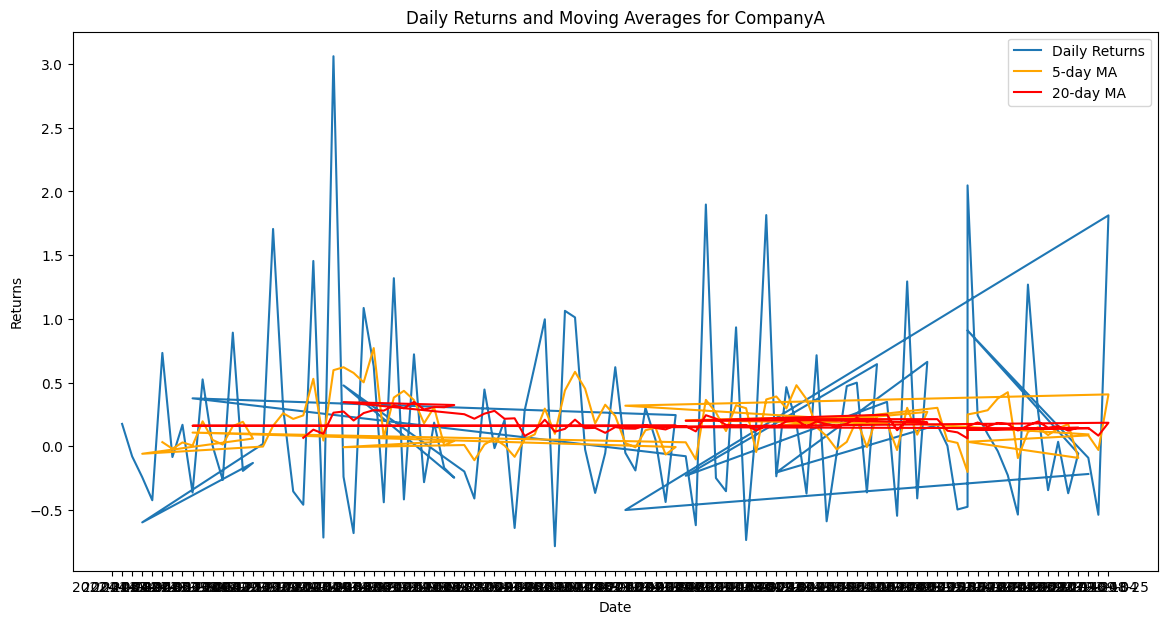

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df_highest_avg_range['Date'], df_highest_avg_range['Daily Returns'], label='Daily Returns')
plt.plot(df_highest_avg_range['Date'], df_highest_avg_range['5-day MA'], label='5-day MA', color='orange')
plt.plot(df_highest_avg_range['Date'], df_highest_avg_range['20-day MA'], label='20-day MA', color='red')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title(f'Daily Returns and Moving Averages for {highest_avg_price_range}')
plt.legend()
plt.show()
